In [2]:
# imports
# standard libraries
import pandas as pd
import numpy as np

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.3f}'.format

In [15]:
df = pd.read_csv("../data/raw/Customer-Churn-Records.csv")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [17]:
df.shape

(10000, 18)

In [18]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.860",1,0,1,"112,542.580",0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,"93,826.630",0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.820",1,1,1,"79,084.100",0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,"113,755.780",2,1,0,"149,756.710",1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,"10,062.800",0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,"115,046.740",4,1,0,"119,346.880",1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,"142,051.070",2,0,1,"74,940.500",0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,"134,603.880",1,1,1,"71,725.730",0,0,3,GOLD,342


RowNumber and Surname are non-informative features for model training and should be dropped.

CustomerId is not required in the training pipeline and can be excluded.

In [19]:
# Check inconsistencies in datatypes
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Feature Name Inconsistencies

Standardize feature names to ensure consistency across the dataset and subsequent notebooks

In [20]:
# Quickly check distributions
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,"10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000"
mean,"5,000.500","15,690,940.569",650.529,38.922,5.013,"76,485.889",1.530,0.706,0.515,"100,090.240",0.204,0.204,3.014,606.515
std,"2,886.896","71,936.186",96.653,10.488,2.892,"62,397.405",0.582,0.456,0.500,"57,510.493",0.403,0.403,1.406,225.925
min,1.000,"15,565,701.000",350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000,0.000,1.000,119.000
25%,"2,500.750","15,628,528.250",584.000,32.000,3.000,0.000,1.000,0.000,0.000,"51,002.110",0.000,0.000,2.000,410.000
50%,"5,000.500","15,690,738.000",652.000,37.000,5.000,"97,198.540",1.000,1.000,1.000,"100,193.915",0.000,0.000,3.000,605.000
75%,"7,500.250","15,753,233.750",718.000,44.000,7.000,"127,644.240",2.000,1.000,1.000,"149,388.247",0.000,0.000,4.000,801.000
max,"10,000.000","15,815,690.000",850.000,92.000,10.000,"250,898.090",4.000,1.000,1.000,"199,992.480",1.000,1.000,5.000,"1,000.000"


Balance: Many customers have zero balance. Could mean inactive or low-use accounts.

NumOfProducts: Max is 4, while the average is around 1.5. Few customers may own many products, skewing the mean.

Satisfaction Score: Ranges from 1 to 5. (Check if score differs for high-product or zero-balance customers.)

Estimated Salary: Very broad range (from 11.58 to 199,992.48). Possible income outliers.

Age: Customers are between 18 and 92 years. Different ages may show different patterns in satisfaction or churn.

In [21]:
# Duplicates
len(df[df.duplicated()])

0

In [22]:
# Missing values
nan_counts = df.isnull().sum()
nan_counts[nan_counts > 0]

Series([], dtype: int64)

In [ ]:
# Subset the dataframe; only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Outlier condition for better readability
outlier_condition = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Count outliers per column
outlier_counts = outlier_condition.sum()
outlier_counts


RowNumber                0
CustomerId               0
CreditScore             15
Age                    359
Tenure                   0
Balance                  0
NumOfProducts           60
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                2038
Complain              2044
Satisfaction Score       0
Point Earned             0
dtype: int64

In [30]:
for col in df.select_dtypes(include='object'):
    if col != 'Surname':
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("----")

Value counts for Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
----
Value counts for Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64
----
Value counts for Card Type:
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
----


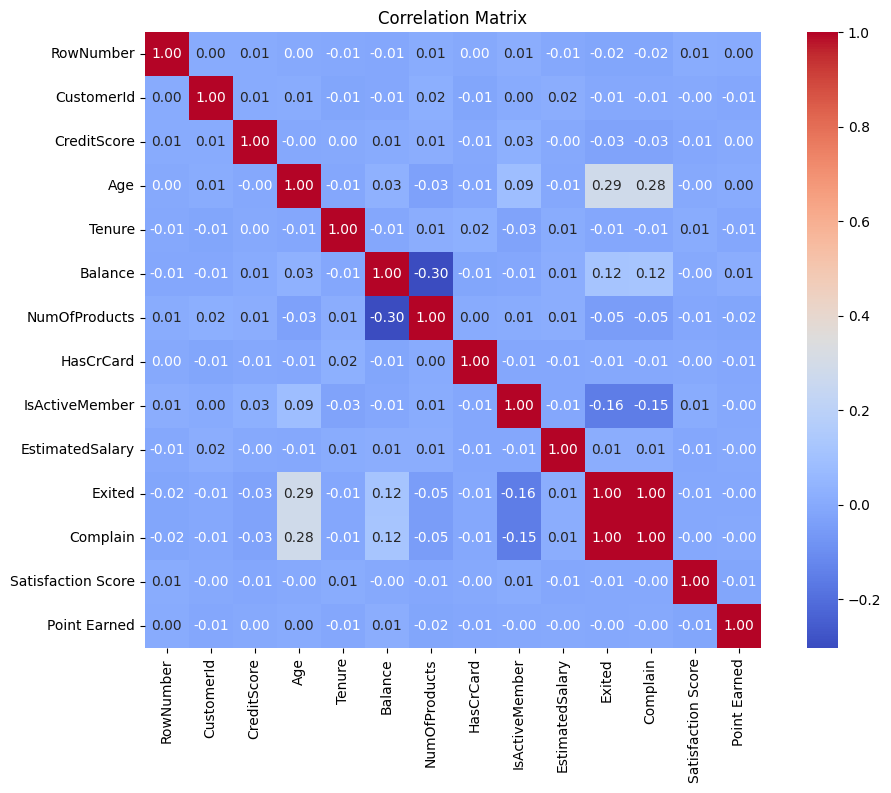

In [31]:
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

High Multicollinearity Between Exited and Complain

These features are highly correlated and do not provide unique or additional information to the model.

Retain only one of them to avoid redundancy and potential issues with model interpretability.

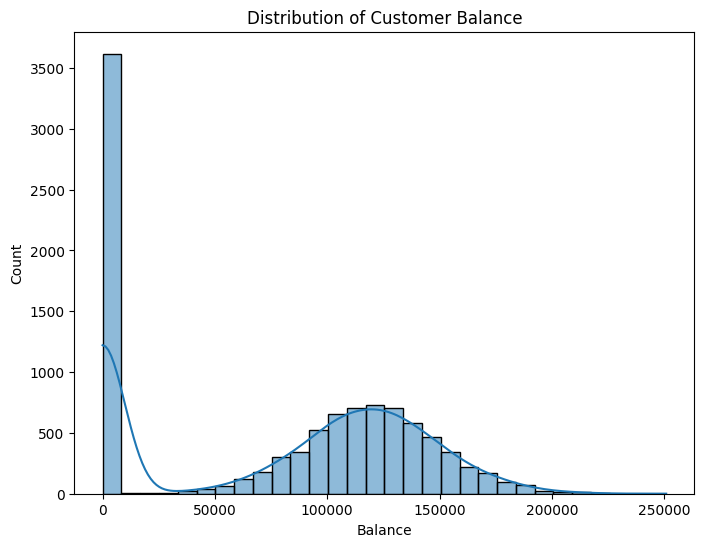

In [32]:
# Distribution of Customer Balance
plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Distribution of Customer Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

A significant number of customers have zero balance. This might indicate inactive or low-use accounts. Consider creating a binary feature (e.g., HasBalance) to capture this behavior.

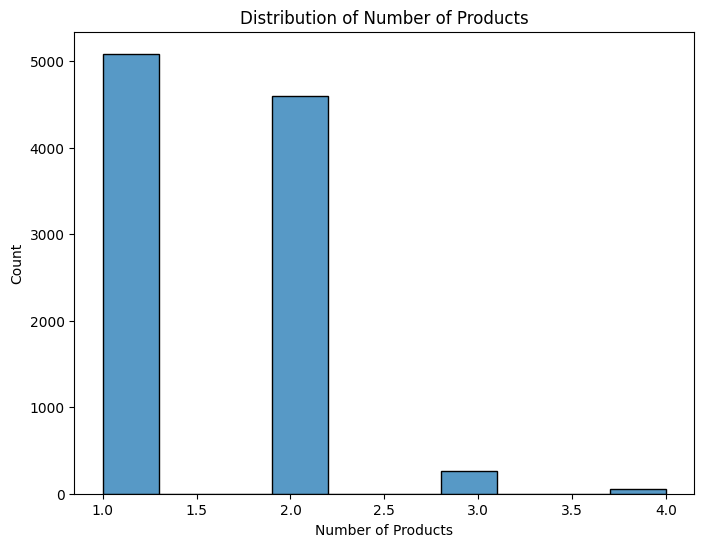

In [33]:
# Distribution of Number of Products
plt.figure(figsize=(8, 6))
sns.histplot(df['NumOfProducts'], bins=10, kde=False)
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

Most customers own 1-2 products, with very few owning 3-4. These outliers might skew the model. Consider capping the maximum value or creating a separate feature for high product ownership.

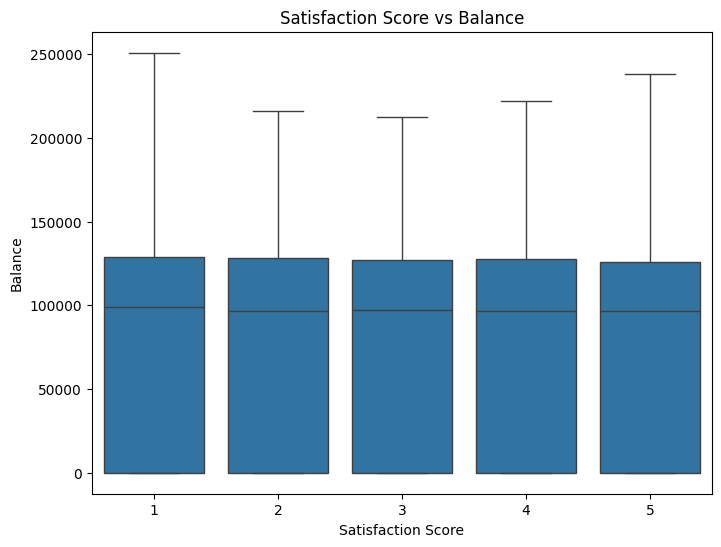

In [34]:
# Satisfaction Score vs Balance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfaction Score', y='Balance', data=df)
plt.title('Satisfaction Score vs Balance')
plt.xlabel('Satisfaction Score')
plt.ylabel('Balance')
plt.show()


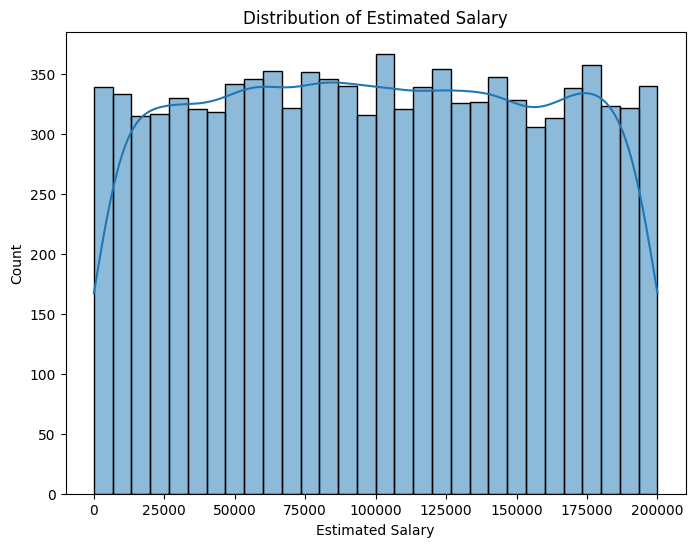

In [35]:
# Distribution of Estimated Salary
plt.figure(figsize=(8, 6))
sns.histplot(df['EstimatedSalary'], bins=30, kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

The Estimated Salary feature has a broad range with potential outliers. Normalize or standardize this feature when using models that are sensitive to scaling to prevent overemphasis on high-income customers.

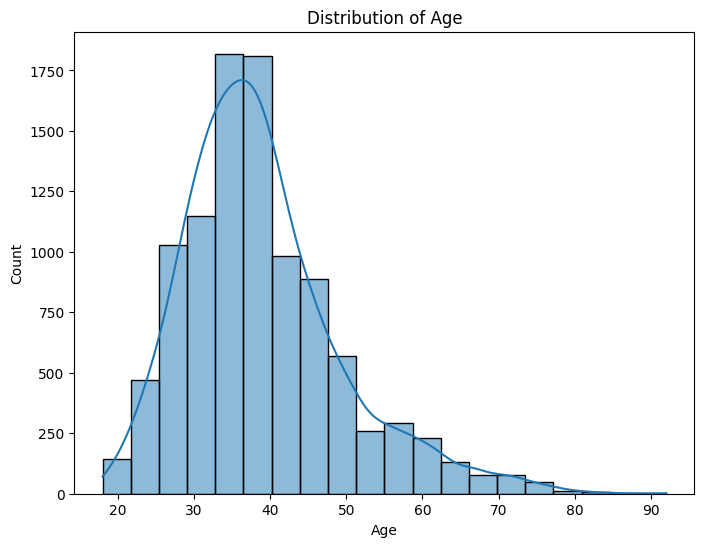

In [36]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The Age distribution is skewed, with most customers in the 30-40 range. Consider binning ages into meaningful categories (e.g., young, middle-aged, senior) to capture distinct churn patterns.

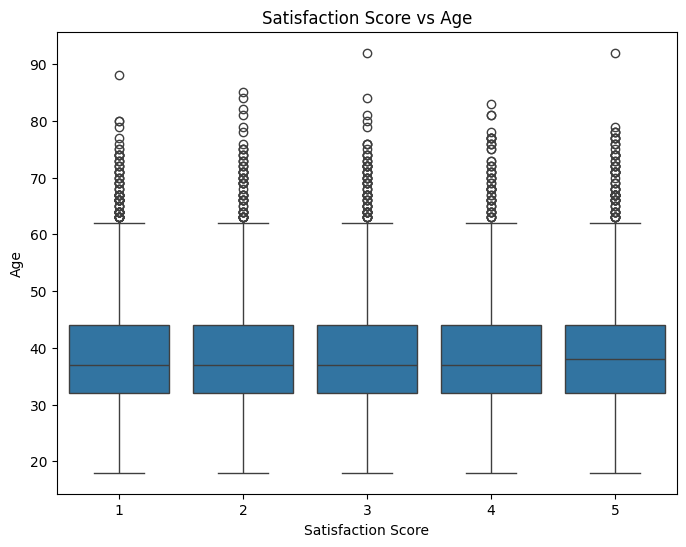

In [37]:
# Satisfaction Score vs Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfaction Score', y='Age', data=df)
plt.title('Satisfaction Score vs Age')
plt.xlabel('Satisfaction Score')
plt.ylabel('Age')
plt.show()

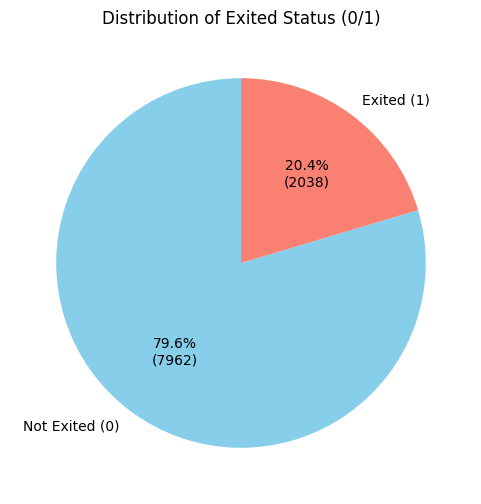

In [38]:
# Count the values for each category in the "Exited" column
counts = df['Exited'].value_counts()
labels = ['Not Exited (0)', 'Exited (1)']
sizes = counts.values  # number of 0s and 1s

# Define a function to display both percentage and absolute values
def autopct_with_counts(pct, sizes):
    total = sum(sizes)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct=lambda pct: autopct_with_counts(pct, sizes),
        startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Exited Status (0/1)')
plt.show()